Exercise 1: 

When performing parameter estimation by optimization, we locally approximate the posterior near the MAP as a Gaussian because of the following reason:

We are interested in finding the covariance matrix, which is the negative inverse of the Hessian matrix, because its diagonals give the error bars for the MAP estimates. Gaussian approximation is useful in giving us the error bars on the parameters we estimate. 

On a relevant note, here's why we're justified in making the Gaussian approximation: 

We saw earlier that the posterior marginalized over sigma resulted in a Student-t distribution, where v = n - 1 represents the number of degrees of freedom. As v tends to infinity, the Student-t distribution approaches a Gaussian. In our example, n = 670, which is large enough to justify approximating the Student-t distribution as a Gaussian.

(For reference, you can look at https://en.wikipedia.org/wiki/Student%27s_t-distribution).

Exercise 2: 

MAP is defined as the set of parameters that maximize the posterior probability distribution. If it is equivalent to minimizing the sum of the square of residuals (henceforth SSR), then our first observation is that the posterior distribution contains an SSR term and that the posterior probability decreases with increasing SSR. Let's dig deeper.

Where do we get the SSR term? 

It follows from the assumption that the data are independent and identically distributed and come from an exponential family of distributions. When the likelihood is a product of exponentials, as it is for the Gaussian distribution, the posterior contains an SSR term, the minimization of which is equivalent to finding the MAP. Here's a handwavy but conceptually useful outline:

1. The likelihood of independent random variables contains a finite product of like terms because P(A and B) = P(A)*P(B). 
2. Due to identical distribution, P(A and B) = P(A) * P(B) = P(X1) * P(X2). The expressions P(X1) and P(X2) are identical save for the index. 
3. Assume that the distribution comes from an exponential family. Then, P(A and B) is in the form of exp(-(f(A)+f(B))). In general, for n elements, it is in the form of exp(-sum_over_all_i(f(Xi))). 
4. For the probability to be bounded, f(Xi) must be positive. Maximizing the likelihood is equivalent to minimizing the sum of f(Xi), which is equivalent to minimizing the sum of squares of f(Xi). 
5. We have thus shown that for the family of exponential distributions, minimizing the sum of squares of f(Xi) minimizes the likelihood. What about the posterior?
6. Recall that going from the likelihood to the posterior involves evaluating the marginalization integral over the unknown parameters (for the Gaussian case, they were mu and sigma). Integrating a distribution from the exponential family yields the same exponential behavior.
7. Therefore, the posterior is also in the form of exp(-sum_over_all_i(f(Xi))). As above, maximizing the posterior is equivalent to minimizing the SSR. 
8. Done! We just showed that under i.i.d observations of a member of an exponential family, MAP is equivalent to minimizing SSR. 

Here's a more rigorous approach by Charnes et al : The Equivalence of Generalized Least Squares and Maximum Likelihood Estimates in the Exponential Family" (1974). They show that MAP estimates are equivalent to Least Squares if the observations are i.i.d and drawn from a distribution that belongs to the exponential family.  

Link: http://www.tandfonline.com/doi/abs/10.1080/01621459.1976.10481508
       
Now, what about going the other way around? Without assuming i.i.d random variables from an exponential family of distributions, can we say anything about whether MAP is equivalent to minimizing SSR? 

It is difficult and not immediately obvious. Using Bayes' Theorem, we can only say that MAP is equivalent to minimizing SSR if and only if the likelihood*prior/evidence is in the form of sums of squares of random variables. Beyond that, I don't know of a way to generalize. 

In other words, If i.i.d (Exponential Family), then MAP = min(SSR). However, it is not necessarily the case that if MAP = min(SSR), then the random variables must necessarily come from i.i.d (Exponential Family), though I can't think of an exception that would prove the statement. 

Exercise 3: 

1. The amount of time between repressor-operator binding events is exponentially distributed because repressor-operator binding events can be modelled as a Poisson process and the inter-arrival times of a Poisson process are exponentially distributed. 

2. The number of arrivals in a unit time is Poisson distributed. Hence, the number of times a repressor binds its operator in an hour is Poisson distributed.

3. Based on the data from MLB, the amount of time between no-hitters is exponentially distributed because no-hitters are rare events and can be described as a Poisson process.

4. The number of arrivals in a unit time is Poisson distributed. No-hitters are rare events and the number of such events per unit time is Poisson distributed. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.tools.numdiff as smnd

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

# Make Matplotlib plots appear inline
%matplotlib inline

# We'll use Bokeh a bit
import bokeh.io
import bokeh.charts
bokeh.io.output_notebook()

Loading BokehJS ...

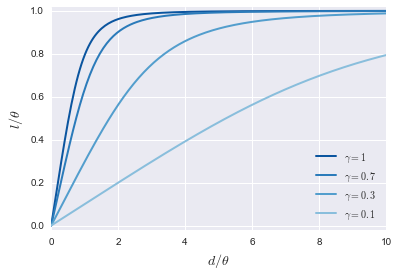

In [2]:
# Generate dimensionless d range to plot
d = np.linspace(0.0, 10.0, 200)

# Values of gamma to use in the plot
gamma = np.array([0.1, 0.3, 0.7, 1.0])

# Make the plots
with sns.color_palette('Blues_r'):
    legend_labels = []
    for i in range(len(gamma)-1, -1, -1):
        plt.plot(d, gamma[i] * d / (1 + (gamma[i] * d)**3)**(1.0 / 3.0), '-')
        legend_labels.append(r'$\gamma = {0:g}$'.format(gamma[i]))

# Make plot pretty
plt.margins(y=0.02)
plt.xlabel(r'$d/\theta$')
plt.ylabel(r'$l/\theta$')
plt.legend(legend_labels, loc='lower right');

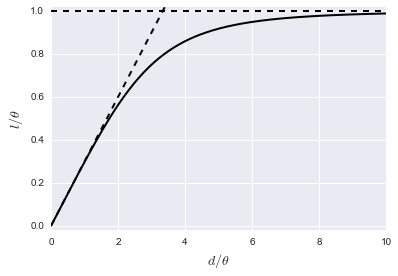

In [3]:
# Plot the full theoretical curve for gamma = 0.3
gamma = 0.3
plt.plot(d, gamma * (d**3 / (1 + (gamma * d)**3))**(1.0 / 3.0), 'k-')

# Plot plateau region (horizontal line at y = 1)
plt.plot([d[0], d[-1]], [1.0, 1.0], 'k--')

# Plot linear region
plt.plot([d[0], d[-1]], gamma * np.array([d[0], d[-1]]), 'k--')

# Make plot pretty
plt.ylim((-0.02, 1.02))
plt.xlabel(r'$d/\theta$')
plt.ylabel(r'$l/\theta$');

In [4]:
# Load data into DataFrame
df = pd.read_csv('../data/good_invitro_droplet_data.csv', comment='#')

# Check it out
df.head()

,Droplet Diameter (um),Droplet Volume (uL),Spindle Length (um),Spindle Width (um),Spindle Area (um2)
0,27.1,0.000010,28.9,10.8,155.8
1,28.2,0.000012,22.7,7.2,81.5
2,29.4,0.000013,26.2,10.5,138.3
3,31.0,0.000016,19.2,9.4,90.5
4,31.0,0.000016,28.4,12.1,172.4


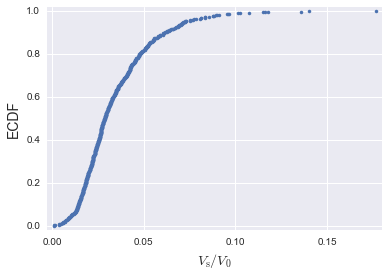

In [5]:
# Compute spindle volume
spindle_volume = np.pi * df['Spindle Length (um)'] \
                        * df['Spindle Width (um)']**2 / 6.0 * 1e-9

# Compute the ratio V_s / V_0
vol_ratio = spindle_volume / df['Droplet Volume (uL)']

# Compute ECDF of the results
ecdf = lambda x: (np.sort(x), np.arange(1, len(x)+1) / len(x))
x, y = ecdf(vol_ratio)

# Plot the ECDF
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel(r'$V_\mathrm{s} / V_0$')
plt.ylabel('ECDF');

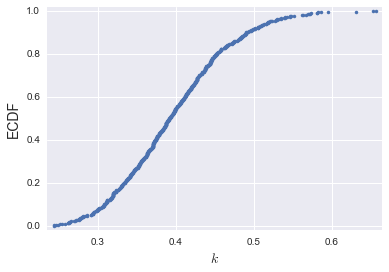

In [6]:
# Compute the aspect ratio
k = df['Spindle Width (um)'] / df['Spindle Length (um)']

# Plot an ECDF of aspect ratio
x, y= ecdf(k)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel(r'$k$')
plt.ylabel('ECDF');

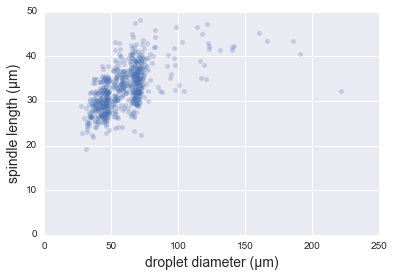

In [7]:
# Use alpha when you have lots of points; helps see overlap
plt.plot(df['Droplet Diameter (um)'], df['Spindle Length (um)'], marker='.', 
         linestyle='none', markersize=10, alpha=0.25)
plt.ylim(0.0, 50.0) # Be sure to include origin
plt.xlabel('droplet diameter (µm)')
plt.ylabel('spindle length (µm)');

In [8]:
# Use alpha when you have lots of points; helps see overlap
p = bokeh.charts.Scatter(df, x='Droplet Diameter (um)', y='Spindle Length (um)',
                         height=350, width=600, color='dodgerblue')
bokeh.io.show(p)

In [9]:
# Estimate spindle length for Model a
theta = np.mean(df['Spindle Length (um)'])
r = np.std(df['Spindle Length (um)'])
n = len(df['Spindle Length (um)'])

# Print results
print("""
Model a results (≈68% of total posterior probability)
-----------------------------------------------------
θ = {0:.1f} ± {1:.1f} µm
""".format(theta, r / np.sqrt(n)))


Model a results (≈68% of total posterior probability)
-----------------------------------------------------
θ = 32.9 ± 0.2 µm



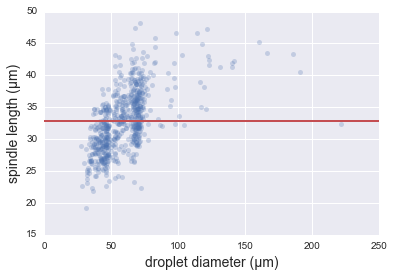

In [10]:
# Use alpha when you have lots of points; helps see overlap
plt.plot(df['Droplet Diameter (um)'], df['Spindle Length (um)'], marker='.', 
         linestyle='none', markersize=10, alpha=0.25)

# Plot the result
plt.plot([0, 250], [theta, theta], color=sns.color_palette()[2])
plt.xlabel('droplet diameter (µm)')
plt.ylabel('spindle length (µm)');

In [20]:
len(df['Droplet Diameter (um)'])

670

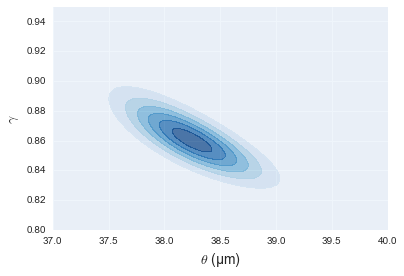

In [11]:
def spindle_length(p, d):
    """
    Theoretical model for spindle length
    """
    theta, gamma = p
    return gamma * d / np.cbrt(1 + (gamma * d / theta)**3)

def log_post(p, d, ell):
    """
    Compute log of posterior for single set of parameters.
    p[0] = theta
    p[1] = gamma
    """
    # Unpack parameters
    theta, gamma = p
    
    # Theoretical spindle length
    ell_theor = spindle_length(p, d)
    
    return -len(d) / 2 * np.log(np.sum((ell - ell_theor)**2))

# Parameter values to plot
th = np.linspace(37, 40, 100)
gamma = np.linspace(0.8, 0.95, 100)

# Make a grid
tt, gg = np.meshgrid(th, gamma)

# Compute log posterior
log_posterior = np.empty_like(tt)
for j in range(len(th)):
    for i in range(len(gamma)):
        log_posterior[i, j] = log_post(np.array([tt[i,j], gg[i,j]]),
                                       df['Droplet Diameter (um)'],
                                       df['Spindle Length (um)'])

# Get things to scale better
log_posterior -= log_posterior.max()
        
# Plot the results
plt.contourf(tt, gg, np.exp(log_posterior), cmap=plt.cm.Blues, alpha=0.7)
plt.xlabel(r'$\theta$ (µm)')
plt.ylabel(r'$\gamma$');

In [12]:
def resid(p, d, ell):
    """
    Residuals for spindle length model.
    """
    return ell - spindle_length(p, d)

In [13]:
# Initial guess
p0 = np.array([40, 0.6])

In [15]:
import scipy.optimize
# Extra arguments as a tuple
args = (df['Droplet Diameter (um)'].values, df['Spindle Length (um)'].values)

# Compute the MAP
popt, _ = scipy.optimize.leastsq(resid, p0, args=args)

# Extract the values
theta, gamma = popt

# Print results
print("""
Model 2b, most probable parameters
----------------------------------
θ = {0:.1f} µm
γ = {1:.2f}
""".format(theta, gamma))


Model 2b, most probable parameters
----------------------------------
θ = 38.2 µm
γ = 0.86



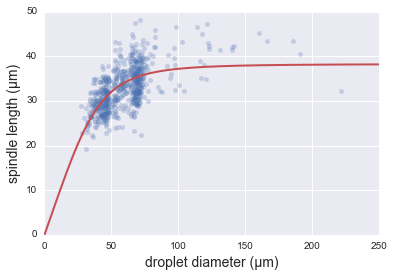

In [16]:
# Values of droplet diameter to plot
d_plot = np.linspace(0, 250, 200)

# Theoretical curve
spindle_theor = spindle_length(popt, d_plot)

# Plot results
plt.plot(df['Droplet Diameter (um)'], df['Spindle Length (um)'], marker='.', 
         linestyle='none', markersize=10, alpha=0.25)

# Plot the result
plt.plot(d_plot, spindle_theor, color=sns.color_palette()[2])
plt.xlabel('droplet diameter (µm)')
plt.ylabel('spindle length (µm)');

In [17]:
hes = smnd.approx_hess(popt, log_post, args=args)

In [18]:
# Compute the covariance matrix
cov = -np.linalg.inv(hes)

# Look at it
cov

array([[ 0.15357222, -0.00538284],
       [-0.00538284,  0.0003034 ]])

In [19]:
# Report results
print("""
Results for Model b (≈ 68% of total probability)
------------------------------------------------
θ = {0:.1f} ± {1:.1f} µm
γ = {2:.2f} ± {3:.2f}
""".format(theta, np.sqrt(cov[0,0]), gamma, np.sqrt(cov[1,1])))


Results for Model b (≈ 68% of total probability)
------------------------------------------------
θ = 38.2 ± 0.4 µm
γ = 0.86 ± 0.02

